# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 10K
- Data = [Ctype2, Ctype4, Ctype6, Ctype8]

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from trainer.supervised_trainer_unmatching import SupervisedTrainer_unmatching
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
data_name = ["Bracket_Ctype2", "Bracket_Ctype4", "Bracket_Ctype6", "Bracket_Ctype8"]
data_path = ["N100", "Ctype4", "Ctype6", "Ctype8"]
character_accuracy = []
sentance_accuracy = []

# Prepare dataset

data : Bracket_Ctype2


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-26 20:24:26,166 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-26 20:24:51,185 INFO   Finished epoch 1: Train loss: 17.2305,

2019-02-26 20:47:30,321 INFO   Finished epoch 53: Train loss: 1.8634, Dev loss: 2.2365, Accuracy(Character): 0.6693, Accuracy(Word): 0.0897
2019-02-26 20:47:59,207 INFO   Finished epoch 54: Train loss: 1.8401, Dev loss: 2.2935, Accuracy(Character): 0.6680, Accuracy(Word): 0.1044
2019-02-26 20:48:28,903 INFO   Finished epoch 55: Train loss: 1.8243, Dev loss: 2.4923, Accuracy(Character): 0.6441, Accuracy(Word): 0.0728
2019-02-26 20:48:58,882 INFO   Finished epoch 56: Train loss: 1.8443, Dev loss: 2.2933, Accuracy(Character): 0.6567, Accuracy(Word): 0.0897
2019-02-26 20:49:28,906 INFO   Finished epoch 57: Train loss: 1.8000, Dev loss: 2.1947, Accuracy(Character): 0.6801, Accuracy(Word): 0.1012
2019-02-26 20:49:58,435 INFO   Finished epoch 58: Train loss: 1.7578, Dev loss: 2.2344, Accuracy(Character): 0.6698, Accuracy(Word): 0.0751
2019-02-26 20:50:28,126 INFO   Finished epoch 59: Train loss: 1.7509, Dev loss: 2.6983, Accuracy(Character): 0.6315, Accuracy(Word): 0.0880
2019-02-26 20:50:57,

data : Bracket_Ctype4


2019-02-26 21:10:09,568 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-26 21:10:38,122 INFO   Finished epoch 1: Train loss: 17.1921, Dev loss: 14.2869, Accuracy(Character): 0.1064, Accuracy(Word): 0.0000
2019-02-26 21:11:06,049 INFO   Finished epoch 2: Train loss: 13.4613, Dev loss: 13.1006, Accuracy(Character): 0.1332, Accuracy(Word): 0.0000
2019-02-26 21:11:34,239 INFO   Finished epoch 3: Train loss: 12.5768, Dev loss: 16.4954, Accuracy(Character): 0.1202, Accuracy(Word): 0.0000
2019-02-26 21:12:03,423 INFO   Finished epoch 4: Train loss: 11.7658, Dev loss: 14.3065, Accuracy(Character): 0.1587, Accuracy(Word): 0.0000
2019-02-26 21:12:31,757 INFO   Finished epoch 5: Train loss: 11.5166, Dev loss: 15.3312, Accuracy(Character): 0.1567, Accuracy(Word): 0.0000
2019-02-26 21:12:59,740 INFO   Finished epoch 6: Train loss: 10.9593, Dev loss: 13.9643, Accuracy(Character): 0.1700,

2019-02-26 21:37:43,492 INFO   Finished epoch 59: Train loss: 1.5145, Dev loss: 1.8830, Accuracy(Character): 0.7519, Accuracy(Word): 0.2572
2019-02-26 21:38:11,138 INFO   Finished epoch 60: Train loss: 1.6148, Dev loss: 1.8025, Accuracy(Character): 0.7672, Accuracy(Word): 0.2411
2019-02-26 21:38:38,762 INFO   Finished epoch 61: Train loss: 1.5696, Dev loss: 2.1523, Accuracy(Character): 0.7175, Accuracy(Word): 0.2082
2019-02-26 21:39:06,588 INFO   Finished epoch 62: Train loss: 1.6040, Dev loss: 1.8917, Accuracy(Character): 0.7624, Accuracy(Word): 0.2966
2019-02-26 21:39:34,277 INFO   Finished epoch 63: Train loss: 1.5254, Dev loss: 1.7852, Accuracy(Character): 0.7587, Accuracy(Word): 0.2447
2019-02-26 21:40:01,813 INFO   Finished epoch 64: Train loss: 1.6072, Dev loss: 1.8534, Accuracy(Character): 0.7557, Accuracy(Word): 0.2131
2019-02-26 21:40:29,240 INFO   Finished epoch 65: Train loss: 1.5000, Dev loss: 1.8708, Accuracy(Character): 0.7614, Accuracy(Word): 0.2424
2019-02-26 21:40:56,

data : Bracket_Ctype6


2019-02-26 21:56:55,008 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-26 21:57:23,391 INFO   Finished epoch 1: Train loss: 17.2013, Dev loss: 14.4780, Accuracy(Character): 0.1087, Accuracy(Word): 0.0000
2019-02-26 21:57:51,201 INFO   Finished epoch 2: Train loss: 13.8003, Dev loss: 16.9508, Accuracy(Character): 0.1169, Accuracy(Word): 0.0000
2019-02-26 21:58:18,674 INFO   Finished epoch 3: Train loss: 12.5902, Dev loss: 16.5486, Accuracy(Character): 0.1539, Accuracy(Word): 0.0000
2019-02-26 21:58:45,708 INFO   Finished epoch 4: Train loss: 12.6641, Dev loss: 18.2632, Accuracy(Character): 0.1404, Accuracy(Word): 0.0000
2019-02-26 21:59:13,699 INFO   Finished epoch 5: Train loss: 13.1209, Dev loss: 13.7857, Accuracy(Character): 0.1804, Accuracy(Word): 0.0000
2019-02-26 21:59:41,710 INFO   Finished epoch 6: Train loss: 12.1329, Dev loss: 12.8828, Accuracy(Character): 0.1730,

2019-02-26 22:24:12,522 INFO   Finished epoch 59: Train loss: 1.4881, Dev loss: 1.8269, Accuracy(Character): 0.7702, Accuracy(Word): 0.1407
2019-02-26 22:24:40,648 INFO   Finished epoch 60: Train loss: 1.5003, Dev loss: 1.6242, Accuracy(Character): 0.7825, Accuracy(Word): 0.1603
2019-02-26 22:25:08,261 INFO   Finished epoch 61: Train loss: 1.4798, Dev loss: 1.7162, Accuracy(Character): 0.7902, Accuracy(Word): 0.1628
2019-02-26 22:25:36,383 INFO   Finished epoch 62: Train loss: 1.4954, Dev loss: 1.6073, Accuracy(Character): 0.7857, Accuracy(Word): 0.1512
2019-02-26 22:26:04,071 INFO   Finished epoch 63: Train loss: 1.4390, Dev loss: 1.6380, Accuracy(Character): 0.7788, Accuracy(Word): 0.1440
2019-02-26 22:26:32,107 INFO   Finished epoch 64: Train loss: 1.4360, Dev loss: 1.8344, Accuracy(Character): 0.7448, Accuracy(Word): 0.1343
2019-02-26 22:26:59,311 INFO   Finished epoch 65: Train loss: 1.3939, Dev loss: 1.5750, Accuracy(Character): 0.8091, Accuracy(Word): 0.1428
2019-02-26 22:27:27,

data : Bracket_Ctype8


2019-02-26 22:43:18,980 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-26 22:43:47,167 INFO   Finished epoch 1: Train loss: 16.5649, Dev loss: 14.4171, Accuracy(Character): 0.1040, Accuracy(Word): 0.0000
2019-02-26 22:44:15,127 INFO   Finished epoch 2: Train loss: 13.1147, Dev loss: 13.8672, Accuracy(Character): 0.1345, Accuracy(Word): 0.0000
2019-02-26 22:44:41,791 INFO   Finished epoch 3: Train loss: 12.0622, Dev loss: 13.6531, Accuracy(Character): 0.1451, Accuracy(Word): 0.0000
2019-02-26 22:45:08,644 INFO   Finished epoch 4: Train loss: 10.5371, Dev loss: 16.1136, Accuracy(Character): 0.1469, Accuracy(Word): 0.0000
2019-02-26 22:45:37,302 INFO   Finished epoch 5: Train loss: 11.8274, Dev loss: 15.3094, Accuracy(Character): 0.1670, Accuracy(Word): 0.0000
2019-02-26 22:46:04,756 INFO   Finished epoch 6: Train loss: 12.3068, Dev loss: 22.4928, Accuracy(Character): 0.2102,

2019-02-26 23:11:27,631 INFO   Finished epoch 59: Train loss: 1.8730, Dev loss: 2.2796, Accuracy(Character): 0.6637, Accuracy(Word): 0.1149
2019-02-26 23:11:56,258 INFO   Finished epoch 60: Train loss: 1.9112, Dev loss: 2.2657, Accuracy(Character): 0.6607, Accuracy(Word): 0.2543
2019-02-26 23:12:24,766 INFO   Finished epoch 61: Train loss: 1.8543, Dev loss: 2.2329, Accuracy(Character): 0.6684, Accuracy(Word): 0.2551
2019-02-26 23:12:53,128 INFO   Finished epoch 62: Train loss: 1.8488, Dev loss: 2.7579, Accuracy(Character): 0.6111, Accuracy(Word): 0.2705
2019-02-26 23:13:21,830 INFO   Finished epoch 63: Train loss: 1.8606, Dev loss: 2.6891, Accuracy(Character): 0.6079, Accuracy(Word): 0.1562
2019-02-26 23:13:50,872 INFO   Finished epoch 64: Train loss: 1.9921, Dev loss: 2.4365, Accuracy(Character): 0.6367, Accuracy(Word): 0.1142
2019-02-26 23:14:18,845 INFO   Finished epoch 65: Train loss: 1.9311, Dev loss: 2.3829, Accuracy(Character): 0.6448, Accuracy(Word): 0.1174
2019-02-26 23:14:47,

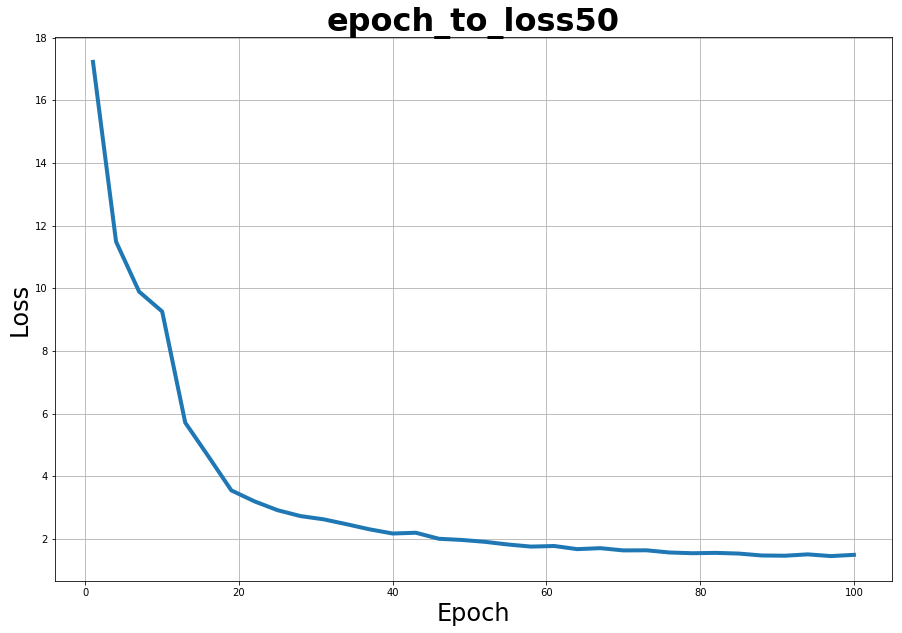

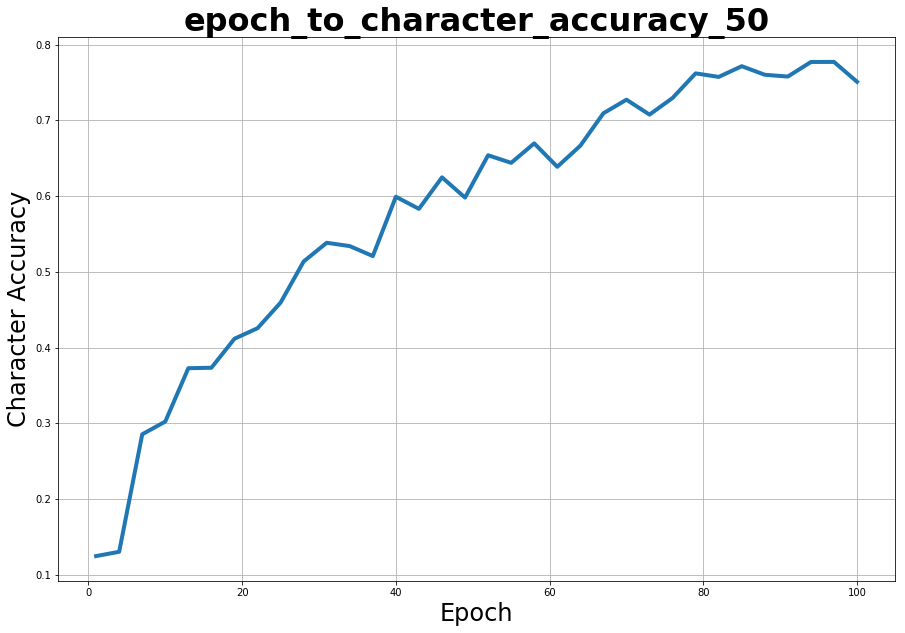

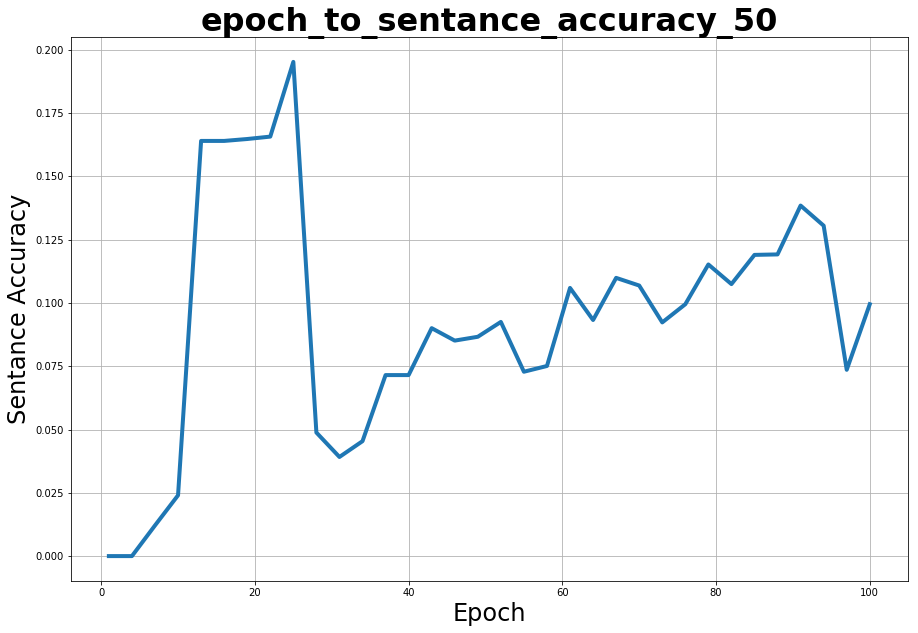

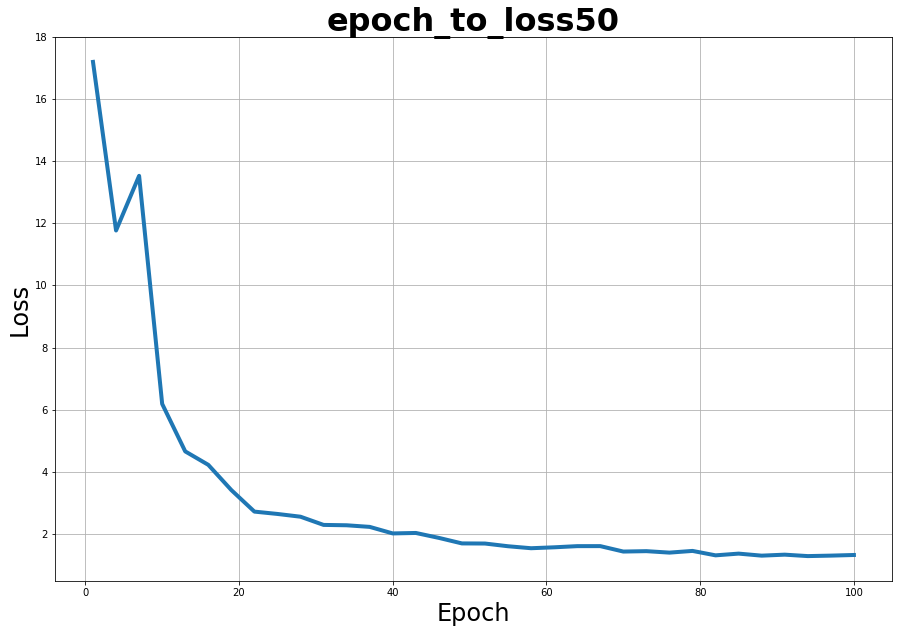

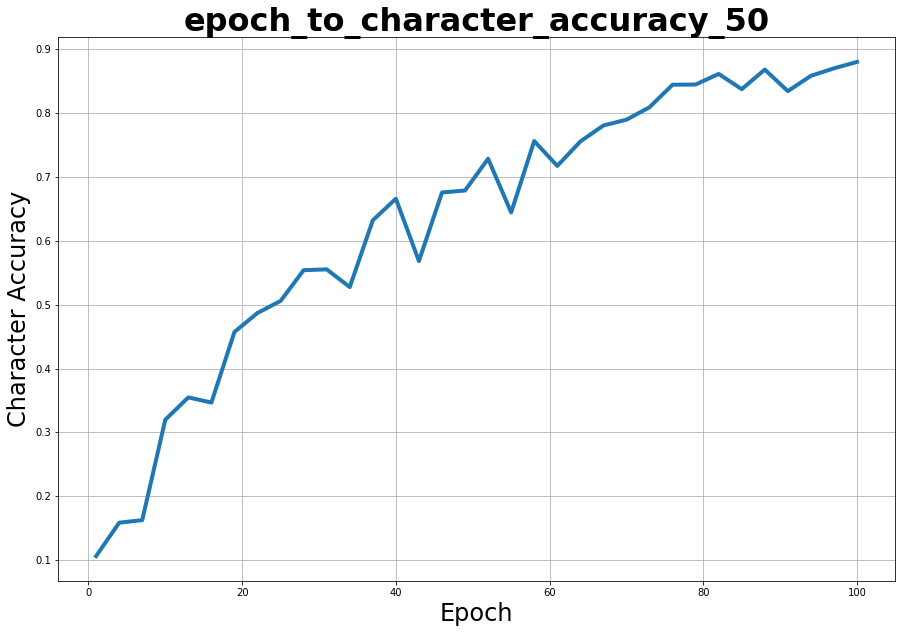

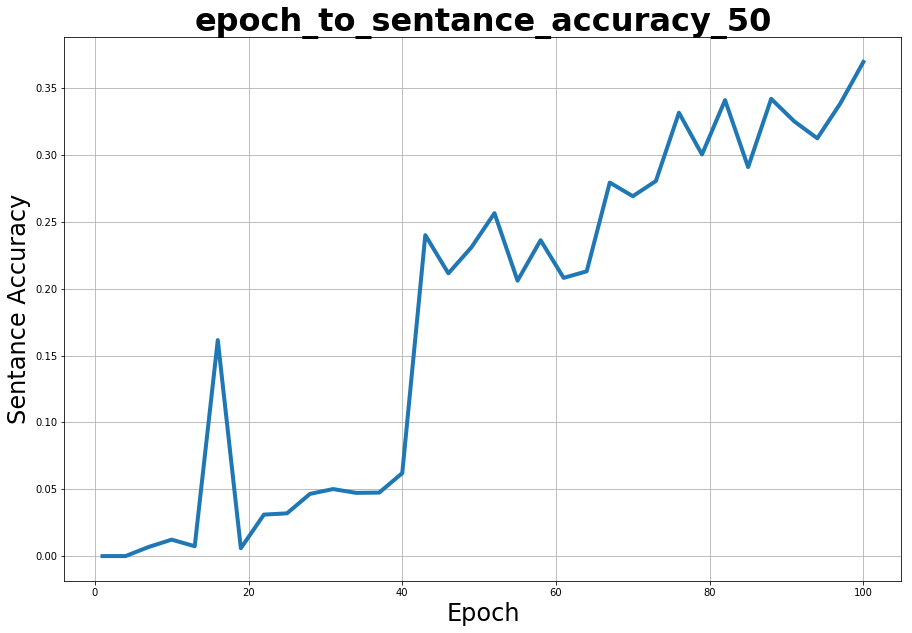

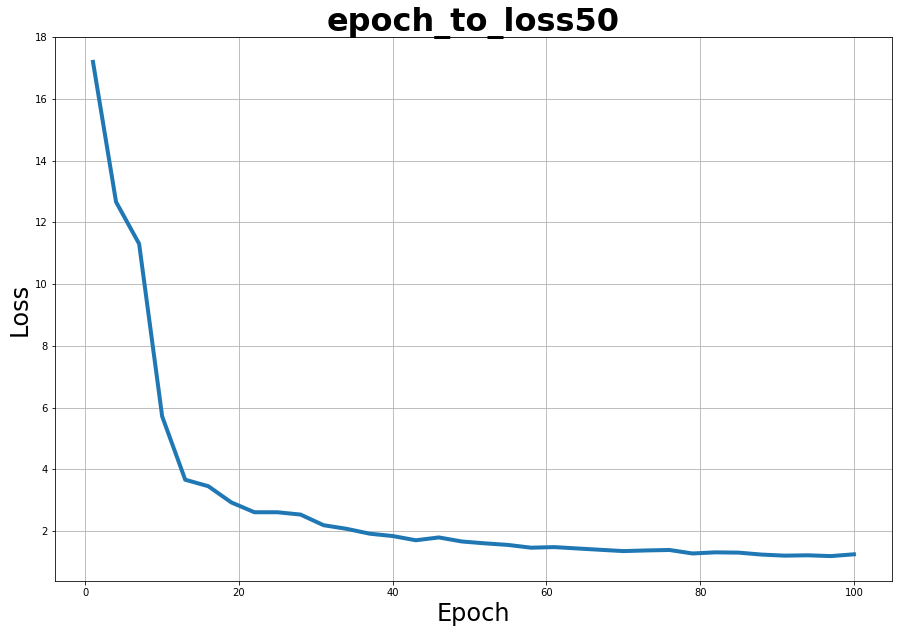

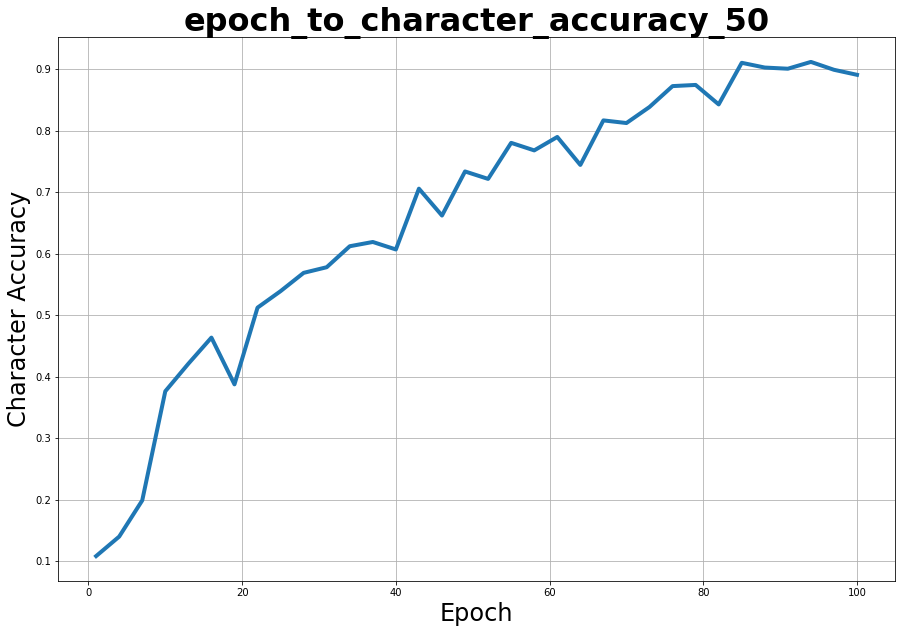

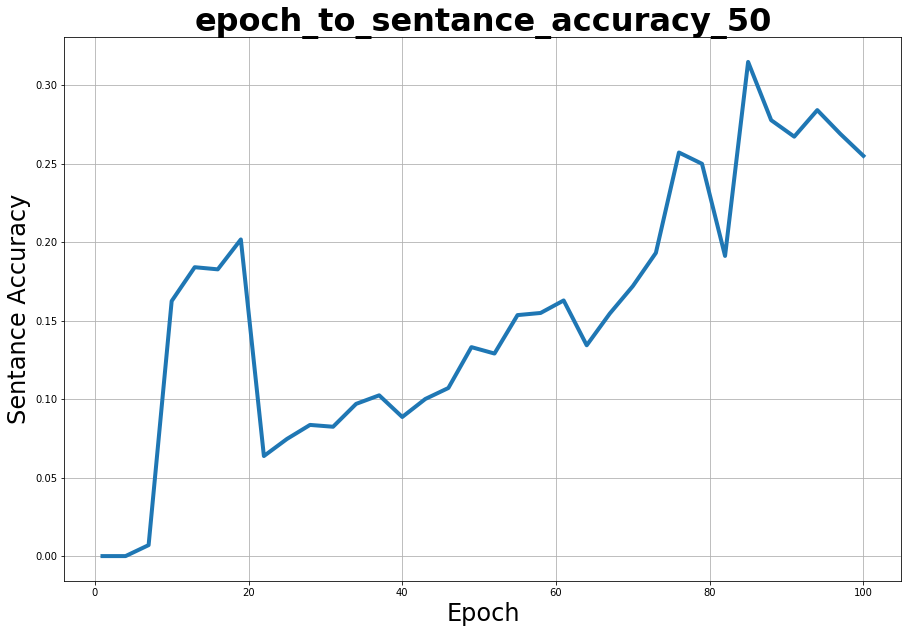

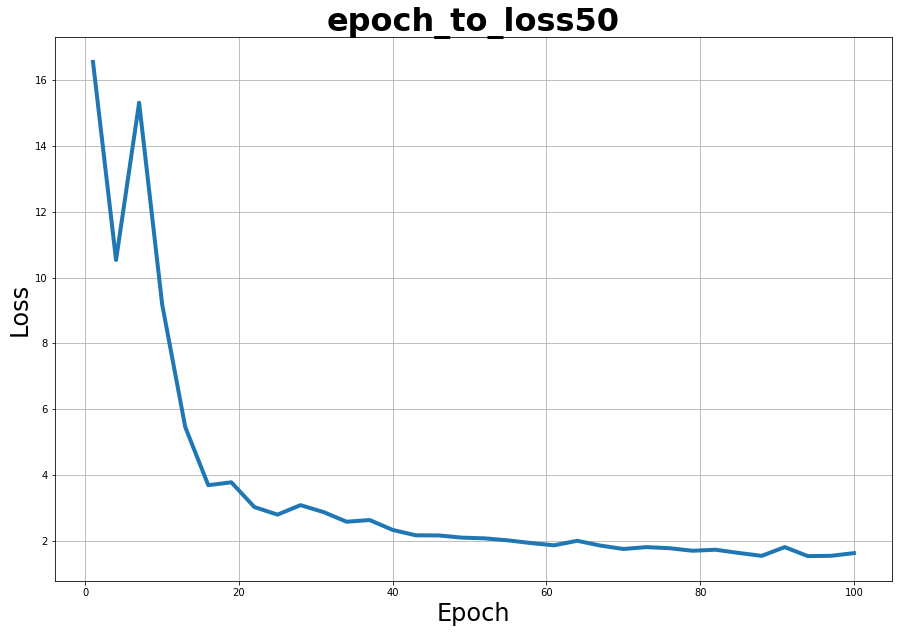

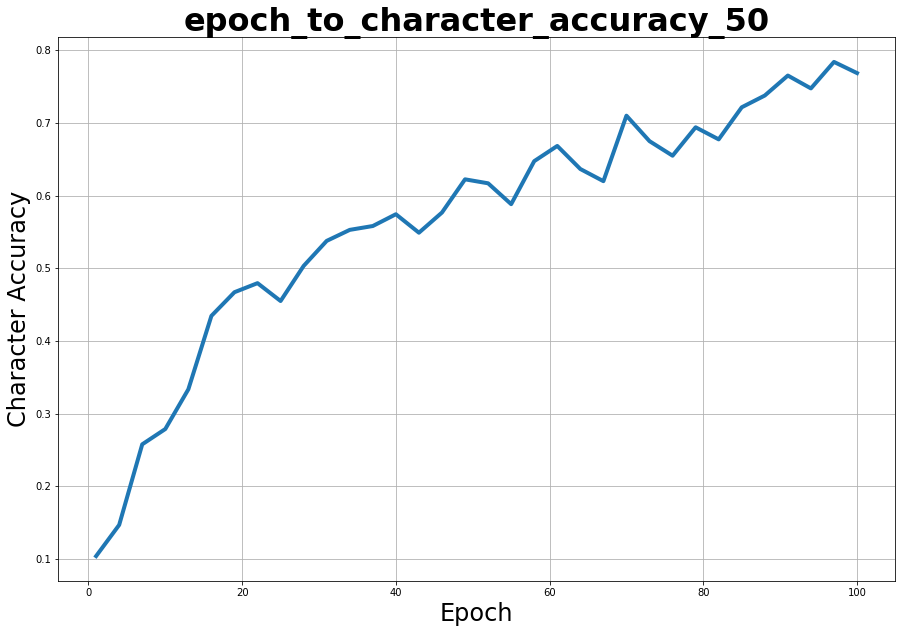

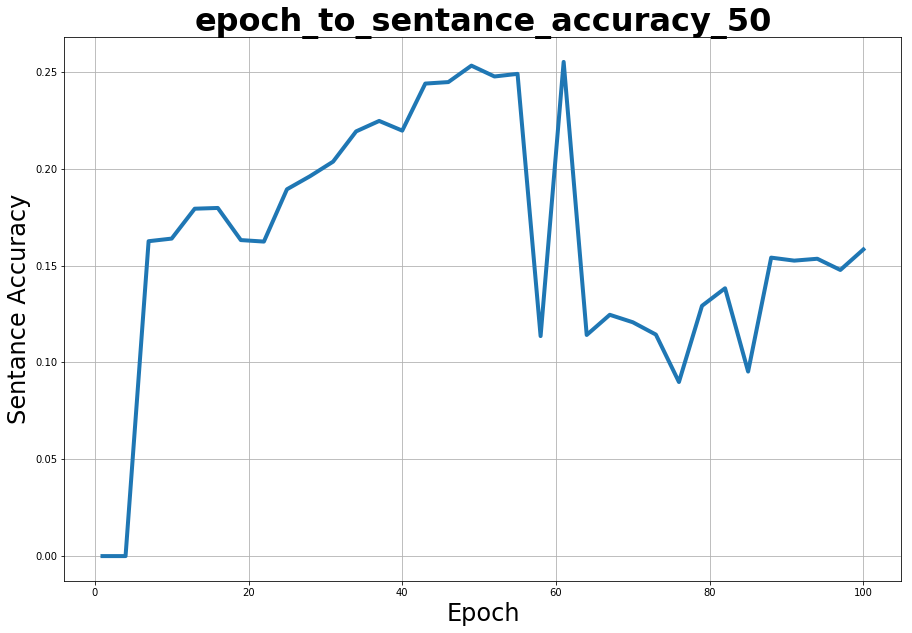

In [4]:
for i, j in zip(data_name, data_path):
    print("data : %s" % i)
    train_path = "data/bracket/" + j + "/data_train.txt"
    dev_path = "data/bracket/" + j + "/data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 104
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path=i)

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    character_accuracy.append(character_accuracy_list)
    sentance_accuracy.append(sentance_accuracy_list)

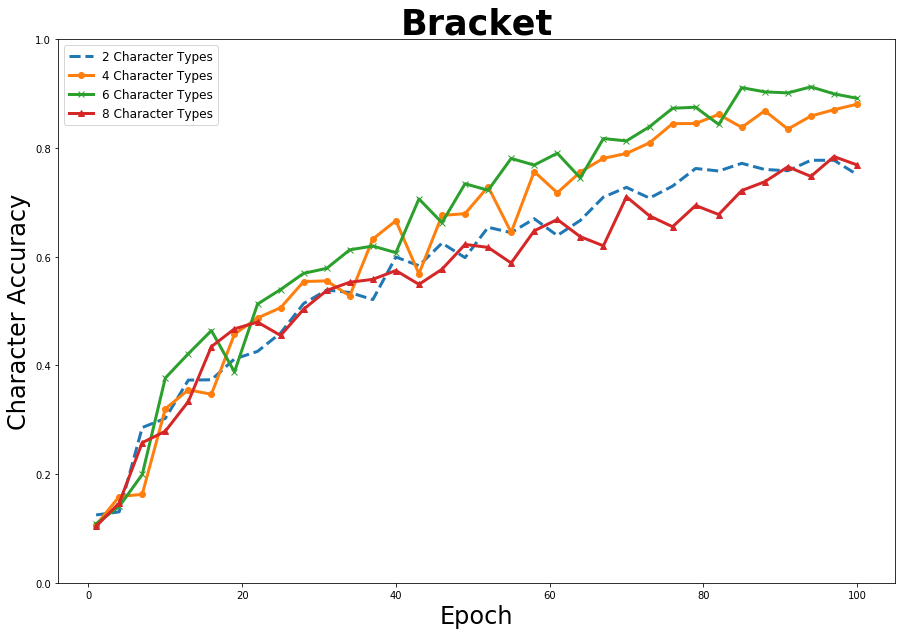

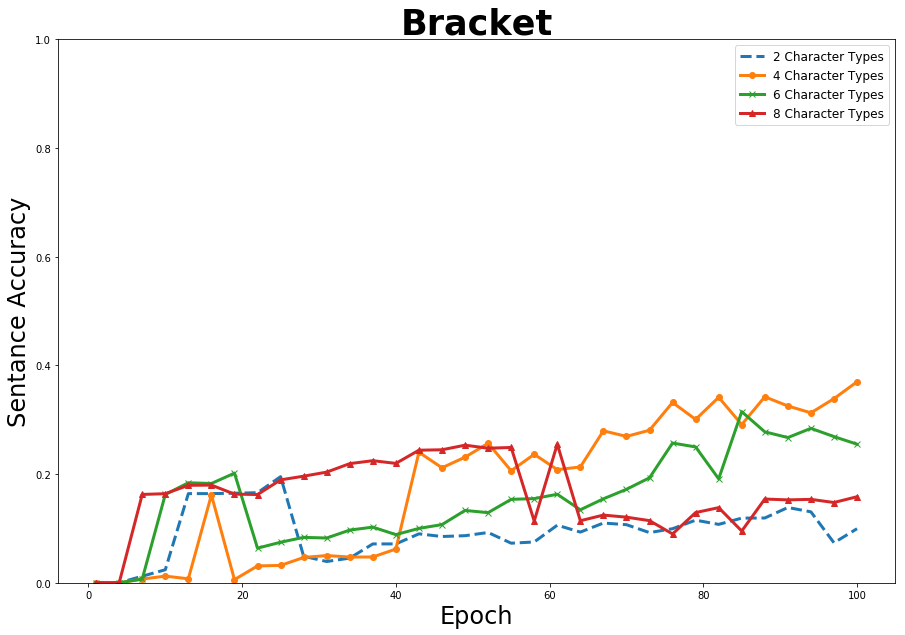

In [9]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', LineWidth=3, label="2 Character Types")
plt.plot(epochs[::3], character_accuracy[1][::3], '-o', LineWidth=3, label="4 Character Types")
plt.plot(epochs[::3], character_accuracy[2][::3], '-x', LineWidth=3, label="6 Character Types")
plt.plot(epochs[::3], character_accuracy[3][::3], '-^', LineWidth=3, label="8 Character Types")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('Bracket', fontsize=35, fontweight=560)
plt.savefig('log/plot/number_of_ctype/bracket_number_of_ctype_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', LineWidth=3, label="2 Character Types")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-o', LineWidth=3, label="4 Character Types")
plt.plot(epochs[::3], sentance_accuracy[2][::3], '-x', LineWidth=3, label="6 Character Types")
plt.plot(epochs[::3], sentance_accuracy[3][::3], '-^', LineWidth=3, label="8 Character Types")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('Bracket', fontsize=35, fontweight=560)
plt.savefig('log/plot/number_of_ctype/bracket_number_of_ctype_to_sentance_accuracy.png')

In [10]:
print(character_accuracy[0])
print(character_accuracy[1])
print(character_accuracy[2])
print(character_accuracy[3])

[0.12479215585487709, 0.13244782965931085, 0.14835496470056814, 0.13049302383539133, 0.11983504865597365, 0.16872466443149028, 0.28561971628057303, 0.3232360992667531, 0.2990229864915908, 0.3024536317722145, 0.34999201722721307, 0.22187824908587517, 0.3728928400369155, 0.34815403246846804, 0.3639949689061265, 0.37348083939829363, 0.38983189448721395, 0.315650518101424, 0.41178257263349727, 0.42345299704442707, 0.3851979922352932, 0.42567259728274204, 0.45318785216683605, 0.4499051802354334, 0.4594884016152459, 0.4661121560106385, 0.5097097775337516, 0.5137478923532824, 0.45521664466536604, 0.5235297095438917, 0.5385061700992589, 0.5521197182275908, 0.5153366588396553, 0.5341136980486988, 0.5599116832747281, 0.5658461933855913, 0.5209518580390416, 0.5866598131641765, 0.5973372585211232, 0.5992687001320078, 0.6104718402822397, 0.6272122989217416, 0.5833031545581633, 0.5685058196360634, 0.6152225635993349, 0.6248914537602754, 0.6412113565651492, 0.6275549740462534, 0.5981783701903794, 0.6

In [11]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])
print(sentance_accuracy[2])
print(sentance_accuracy[3])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.010596026490066225, 0.012109744560075686, 0.010596026490066225, 0.012109744560075686, 0.02403027436140019, 0.011920529801324504, 0.16821192052980133, 0.1640491958372753, 0.16423841059602648, 0.16385998107852412, 0.1640491958372753, 0.16348155156102176, 0.16669820245979186, 0.16480605487228003, 0.18675496688741722, 0.17029328287606432, 0.16575212866603595, 0.1954588457899716, 0.1967833491012299, 0.19526963103122044, 0.1990539262062441, 0.16594134342478714, 0.04881740775780511, 0.02043519394512772, 0.05562913907284768, 0.0391674550614948, 0.06281929990539262, 0.02535477767265847, 0.04541154210028382, 0.058088930936613055, 0.057899716177861875, 0.07152317880794702, 0.07587511825922422, 0.06433301797540208, 0.07152317880794702, 0.08571428571428572, 0.08344370860927153, 0.09006622516556291, 0.07757805108798486, 0.09271523178807947, 0.08514664143803216, 0.09744560075685904, 0.08609271523178808, 0.08666035950804163, 0.09044465468306528, 0.09271523178807947, 0.09252